## Time Series Analysis

Time series: series of data point listed in time order

Example: Temperature during the day, number of taxi rides during a week, stock market price and ...

Trend: Long term progression (for example increase or decrease)

Seasonality: Patterns due to seasonal factors


## Review: Sort the following data frame based on date

`import pandas as pd
df = pd.DataFrame({'Value':['100','78','129'] , 'Date':['02/20/2015','01/15/2016','08/21/2015']})`

## Activity: Obtain the trend and seasonality for air passenger dataset

Addtive model: $x(t) = trend(t) + seasonality(t) + residual(t)$

Steps:

1- Plot the number of passenger based on Month: Hint:

`import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
plt.plot(df['Month'], df['#Passengers'])
plt.show()`

2- Set the index of data frame by Month:

`df  = df.set_index(['Month'])`
    
3- Apply the decomposition to dataframe -> Give us trend and seasonality

`import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df, model='additive')`
    
4- Plot trend, seasonality and residual for passenger dataset

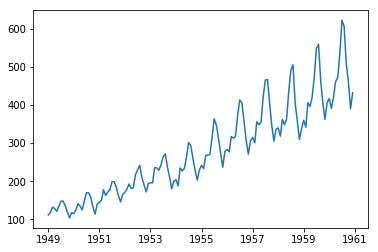

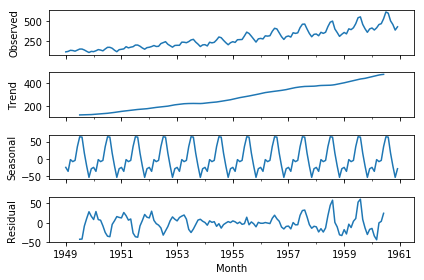

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load and plot passaenger time series 
df = pd.read_csv('AirPassengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
plt.plot(df['Month'], df['#Passengers'])
plt.show()

# Apply decompostion analysis to the time series
df  = df.set_index(['Month'])
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
decomposition.plot()
plt.show()

## Sampling and Smoothing

Most of the time, for time series analysis, the data has many jumps and downs.

It is desired to have smoother version of time series.

We have two options:

1- Sampling the time series

2- Smoothing the time seris


## Activity: Time Series Sampling and Smoothing on Apple dataset

Task: Plot the "Close", which is stock market price at closing time (5:30 p.m. NY time), its sampled version and its smoothed version.

Steps:

1- Load and plot Apple Stock Market dataset:

Hint:

`import pandas as pd
data = pd.read_csv('AAPL.csv')
data['Date'] = pd.to_datetime(data['Date'])
data['Tick'] = range(0, len(data))
plt.plot(data['Date'], data['Close'])
plt.show()`

2- Sample this dataset and plot it:

Hint: use `data.sample()`

3- Smooth this time series ("Close"):

Hint: use `data['Close'].rolling(window=5).mean()`


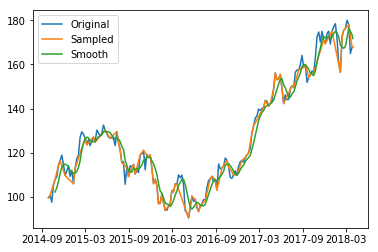

In [24]:
data = pd.read_csv('AAPL.csv')
data['Date'] = pd.to_datetime(data['Date'])
data['Tick'] = range(0, len(data))
plt.plot(data['Date'], data['Close'], label='Original')
           
# Sample time series
data_one_tenth = data.sample(frac=0.5)
data_one_tenth = data_one_tenth.sort_values(by=['Tick'])
plt.plot(data_one_tenth['Date'], data_one_tenth['Close'], label='Sampled')

# Smooth the dataset

data['Rolling_Mean']  = data['Close'].rolling(window=5).mean()
plt.plot(data['Date'], data['Rolling_Mean'], label='Smooth')

# plot them all
plt.legend()
plt.show()


## Using Quandl for Time Series analysis

The libray that we will use for retreiving financial, economic and sociology data is the python api for Quandl.

Head over to https://www.quandl.com/ to  sign up for an account to get an API key first! 

## Activity: Compute the monthly return for Apple stock data for March 2017

In order to compute the montly return for specific month, we should slice the dataset

We again only look at "Close" market price for apple from quandl

Task: compute montly return 

1- First read this article: https://www.quantconnect.com/tutorials/introduction-to-financial-python/rate-of-return,-mean-and-variance

2- Translate the formula to Python code


In [2]:
import quandl
import numpy as np

quandl.ApiConfig.api_key = 'yz2smCsxKsYnJV6sh88w'
#get quandl data
aapl_table = quandl.get('WIKI/AAPL')
aapl_table.to_pickle('apple_quandl.pkl')
# aapl_table.head()
aapl = aapl_table.loc['2017-3',['Open','Close']]

# From compund rate of return formula
aapl['log_price'] = np.log(aapl['Close'])
x = np.diff(aapl['log_price'])
print(aapl)
print(x.sum()*100)

# Another way to compute the montly return
returns = aapl['Close'].pct_change()
print(returns.sum()*100)

               Open   Close  log_price
Date                                  
2017-03-01  137.890  139.79   4.940141
2017-03-02  140.000  138.96   4.934186
2017-03-03  138.780  139.78   4.940070
2017-03-06  139.365  139.34   4.936917
2017-03-07  139.060  139.52   4.938208
2017-03-08  138.950  139.00   4.934474
2017-03-09  138.740  138.68   4.932169
2017-03-10  139.250  139.14   4.935481
2017-03-13  138.850  139.20   4.935912
2017-03-14  139.300  138.99   4.934402
2017-03-15  139.410  140.46   4.944923
2017-03-16  140.720  140.69   4.946559
2017-03-17  141.000  139.99   4.941571
2017-03-20  140.400  141.46   4.952017
2017-03-21  142.110  139.84   4.940499
2017-03-22  139.845  141.42   4.951734
2017-03-23  141.260  140.92   4.948192
2017-03-24  141.500  140.64   4.946203
2017-03-27  139.390  140.88   4.947908
2017-03-28  140.910  143.80   4.968423
2017-03-29  143.680  144.12   4.970646
2017-03-30  144.190  143.93   4.969327
2017-03-31  143.720  143.66   4.967449
2.73081001636184
2.784543

In [4]:
np.log(143.66/139.79)*100

2.7308100163618443